In [ ]:
#To identisy Data insites with following steps 
#problem definition
#spliting training and testing data
#Data Wrangle, Data prepare, data cleanse etc
#Analyze, identify patterns, and explore the data
#Visualize, report, and present ,identify problem solving steps!

In [1]:
download_url="https://github.com/krishnavizster/storessalesdata/blob/main/Stores%20_Sales_Prediction_data.zip"

In [2]:
import os

In [3]:
os.path.basename(download_url)

'Stores%20_Sales_Prediction_data.zip'

In [21]:
!pip install seaborn

     ------------------------------------ 292.8/292.8 kB 296.5 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 54.9/54.9 kB 286.2 kB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 kB 7.5 MB/s eta 0:00:00
  Using cached Pillow-9.2.0-cp37-cp37m-win_amd64.whl (3.3 MB)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from pandas.plotting import scatter_matrix
# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

In [89]:
# Sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from math import sqrt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [5]:
import zipfile
with zipfile.ZipFile(download_url, 'r') as zip_ref:
    zip_ref.extractall(raw_data_dir )

OSError: [Errno 22] Invalid argument: 'https://github.com/krishnavizster/storessalesdata/blob/main/Stores%20_Sales_Prediction_data.zip'

In [5]:
sales_data_train=pd.read_csv(r"D:\DS-Projects\INTERNSHIP PROJECT\ML-SALES AND MARKERTING -Stores Sales Prediction PROJECT\DATA FILES\Train.csv")

In [6]:
sales_data_train.shape

(8523, 12)

In [7]:
sales_data_test=pd.read_csv(r"D:\DS-Projects\INTERNSHIP PROJECT\ML-SALES AND MARKERTING -Stores Sales Prediction PROJECT\DATA FILES\Test.csv")

In [8]:
sales_data_test.shape

(5681, 11)

In [9]:
sales_data_train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
sales_data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [11]:
sales_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
sales_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
#Which features are categorical?
sales_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
#Which features are categorical?
sales_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
sales_data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [16]:
sales_data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
def categorical(dataframe):
    categorical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes == 'O']
    print("No. of Categorical feature : ",len(categorical_features))
    print(categorical_features)

In [18]:
categorical(sales_data_train)

No. of Categorical feature :  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [19]:
categorical(sales_data_test)

No. of Categorical feature :  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
#Which features are numerical?
"""need to figure out Within numerical features are the values discrete, 
continuous, or timeseries based? Among other things this helps us select 
the appropriate plots for visualization."""

In [20]:
def numerical(dataframe):
    numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
    print("No. of Numerical feature : ",len(numerical_features),"\n")
    discrete_features=[feature for feature in numerical_features if dataframe[feature].nunique() <25 ]
    continous_features=[feature for feature in numerical_features if feature not in discrete_features]
    print("No. of Discrete feature : ",len(discrete_features))
    print(discrete_features,'\n')
    print("No. of Continous feature : ",len(continous_features))
    print(continous_features)

In [21]:
numerical(sales_data_train)

No. of Numerical feature :  5 

No. of Discrete feature :  1
['Outlet_Establishment_Year'] 

No. of Continous feature :  4
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [22]:
numerical(sales_data_test)

No. of Numerical feature :  4 

No. of Discrete feature :  1
['Outlet_Establishment_Year'] 

No. of Continous feature :  3
['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [23]:
#statistical analysis 
def desc_numerical(dataframe):
    return dataframe.describe()
def desc_categorical(dataframe):
    return dataframe.describe(include='O')

In [24]:
desc_numerical(sales_data_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
desc_categorical(sales_data_train)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [25]:
desc_numerical(sales_data_test)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [27]:
desc_categorical(sales_data_test)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,FDW10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [28]:
#Dropping the identifiers- FE
sales_data_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
sales_data_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [29]:

#Identification of blank, null or empty values
def null_values(dataframe):
    return dataframe.isnull().sum()
def nul_map(dataframe):

    plt.figure(figsize=(12,12))
    sns.heatmap(dataframe.isnull(),cmap='viridis',yticklabels=False,cbar=False)
    


In [ ]:
"""xticklabels, yticklabels“auto”, bool, list-like, or int, optional ,
If True, plot the column names of the dataframe. If False, don’t plot the column names."""

In [30]:
null_values(sales_data_train)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
"""As clearly seen, the data variable ‘Item_Weight’ contains 1463 and 
'Outlet_Size'contains 2410 missing values out of 8523 records."""

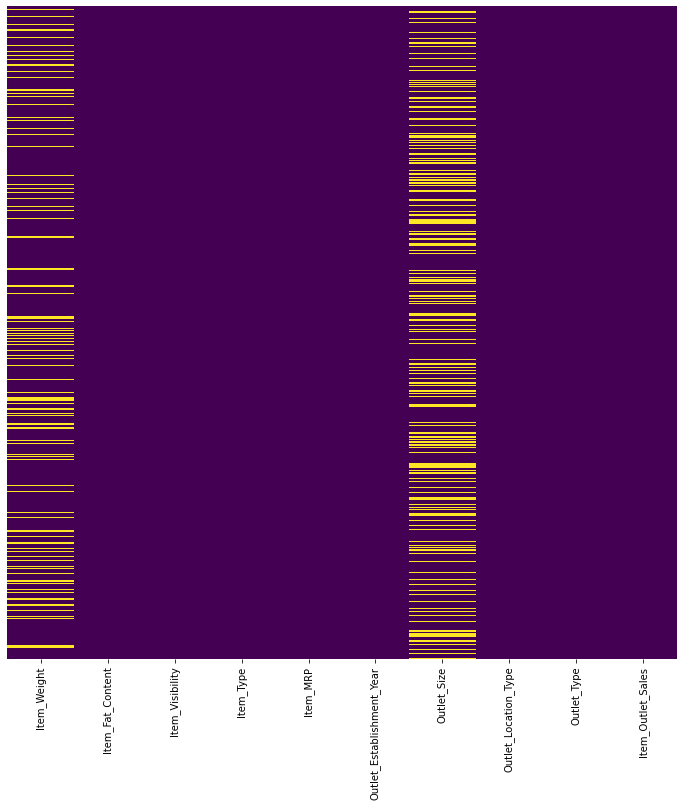

In [31]:
nul_map(sales_data_train)

In [32]:
null_values(sales_data_test)

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
"""As clearly seen, the data variable ‘Item_Weight’ contains 976 and 
'Outlet_Size'contains 1606 missing values out of 8523 records."""

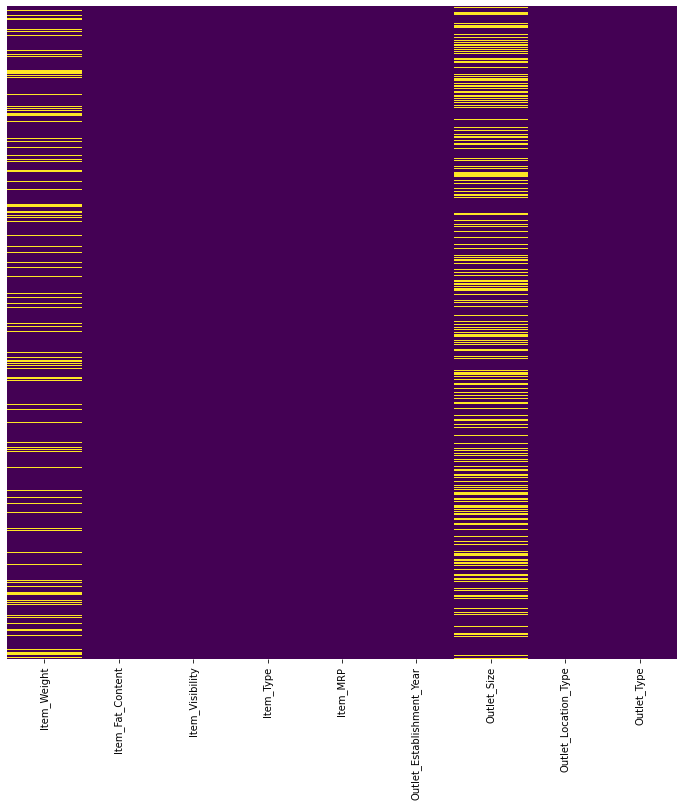

In [33]:
nul_map(sales_data_test)

<AxesSubplot:xlabel='Item_Weight'>

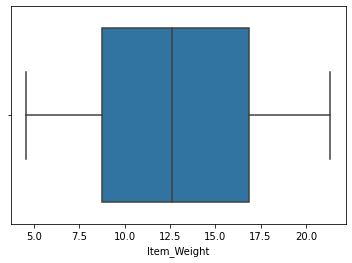

In [34]:
#Missing Values Handling
sns.boxplot('Item_Weight', data = sales_data_train)

In [ ]:
"""Number of Outlier in the column is 0
"""

<AxesSubplot:xlabel='Item_Weight'>

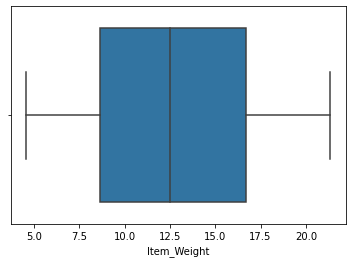

In [35]:
#Missing Values Handling
sns.boxplot('Item_Weight', data = sales_data_test  )

In [ ]:
"""Number of Outlier in the column is 0
"""

In [36]:
#Impute the missing values
def impute_value(dataframe):
    print("Mean = ",dataframe["Item_Weight"].mean(),"; Median = ",dataframe["Item_Weight"].median(),"; Mode = ",dataframe["Item_Weight"].mode()[0])

In [37]:
impute_value(sales_data_train)

Mean =  12.857645184135976 ; Median =  12.6 ; Mode =  12.15


In [38]:
impute_value(sales_data_test)

Mean =  12.695633368756642 ; Median =  12.5 ; Mode =  10.5


In [ ]:
#Impute the missing values
"""sinnce the values are contineous values i choose to impute with mean value"""
#Using the mean() method on all the null values

In [39]:
sales_data_train['Item_Weight']= sales_data_train['Item_Weight'].fillna(sales_data_train['Item_Weight'].mean())
sales_data_test['Item_Weight']= sales_data_test['Item_Weight'].fillna(sales_data_test['Item_Weight'].mean())

In [40]:
sales_data_train['Outlet_Size']= sales_data_train['Outlet_Size'].fillna('mean')
sales_data_test['Outlet_Size']= sales_data_test['Outlet_Size'].fillna("mean")

In [41]:
#corss check null values 
null_values(sales_data_train)

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
null_values(sales_data_test)

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [43]:
#Cleaning the Data
sales_data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,mean,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
sales_data_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [45]:
sales_data_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [46]:
sales_data_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
""""LF" and "low fat" are Same as "Low Fat" and "Reg" is same as "Regular". 
So we combine these Fat contents into one entity."""

In [47]:
sales_data_test["Item_Type"].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [48]:
#Combine fat content
sales_data_train['Item_Fat_Content'] = sales_data_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})
sales_data_test['Item_Fat_Content'] = sales_data_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

In [ ]:
#Adding new columns: Years_Established
"""Deriving new feature from "Outlet_Establishment_Year" 
by subtracting cuurrent year with the Established Year."""

In [49]:
#Years_Established
sales_data_train['Years_Established'] = sales_data_train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
sales_data_test['Years_Established'] = sales_data_test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)


In [50]:
#drop Outlet_Establishment_Year (Its oprtinal)
sales_data_train.drop("Outlet_Establishment_Year",axis=1,inplace=True)
sales_data_test.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [51]:
sales_data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,13
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,mean,Tier 3,Grocery Store,732.3800,24
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,35


In [52]:
sales_data_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Explaratory Data Analysis
#EDA part 1:-Univariate Analysis- Item_Fat_Content
"""univariate analysis is to use the data to describe. The analysis will take data, 
summarise it, and then find some pattern in the data."""

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

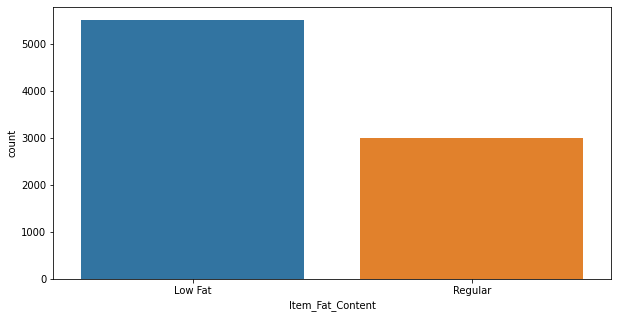

In [53]:
plt.figure(figsize = (10,5))
sns.countplot('Item_Fat_Content', data = sales_data_train)

In [ ]:
"""Observation: Low Fat Items are more sold"""

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

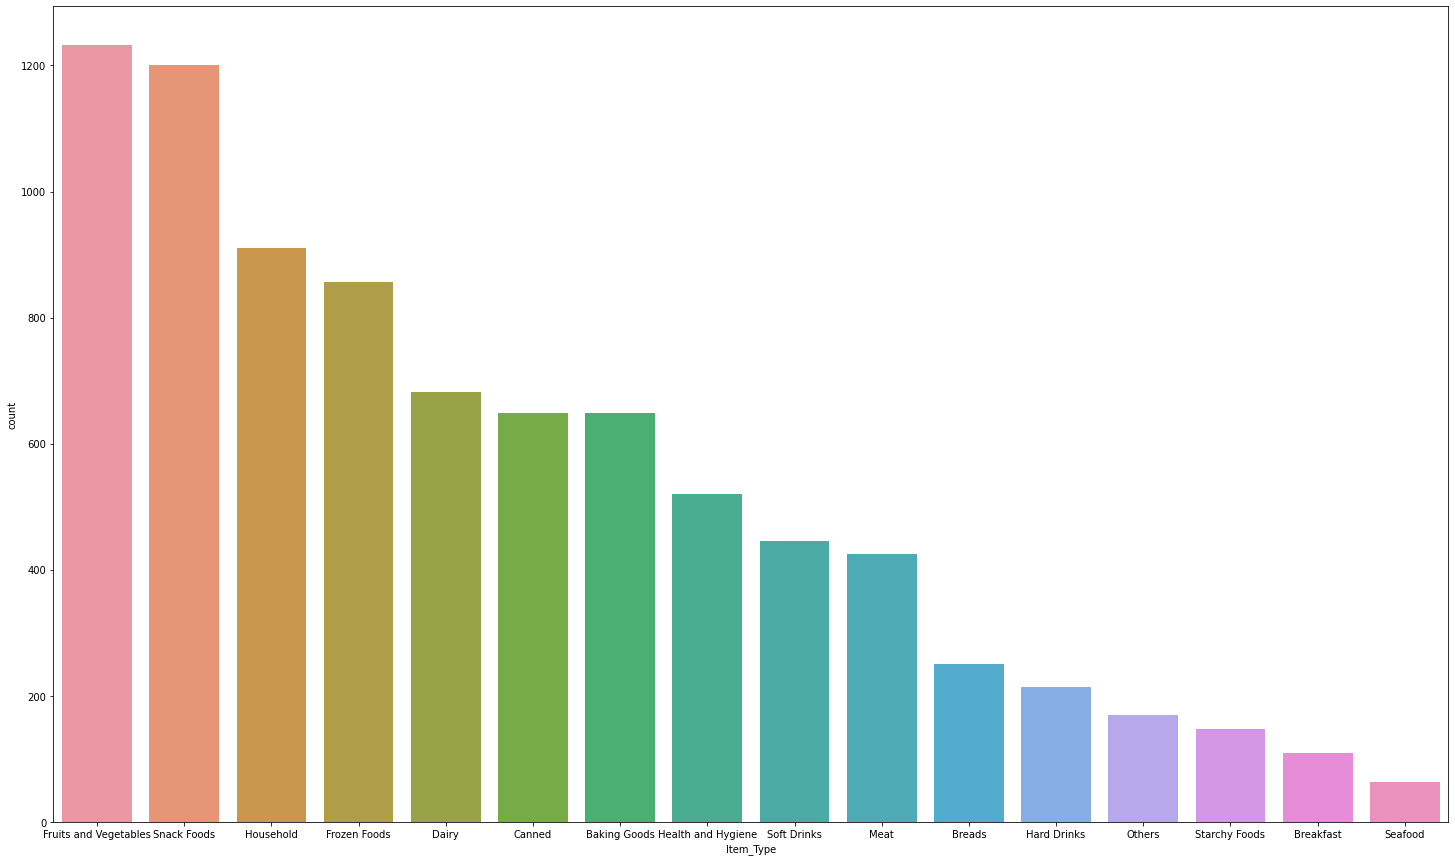

In [54]:
#2.Items contents i,e Item type 
plt.figure(figsize = (25,15))
sns.countplot('Item_Type', data = sales_data_train,order = sales_data_train['Item_Type'].value_counts().index)


In [ ]:
"""Fruits/Vegetables and Snack Foods are the most 
purchased item while seafood is the least"""

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

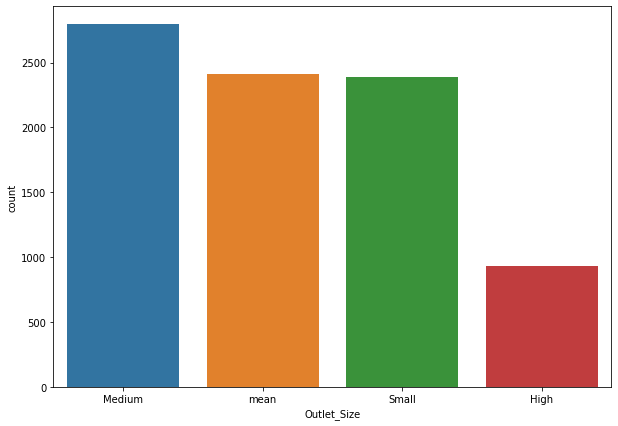

In [55]:
#3.Outlet_Size 
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Size', data = sales_data_train,order = sales_data_train['Outlet_Size'].value_counts().index)

In [ ]:
"""inference:-People prefer to buy from smal and medium sized outlet ,There are more Medium sized Outlets while the 
High sized outlets are less"""

In [ ]:
#NUmber of stores in tires- cities 


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

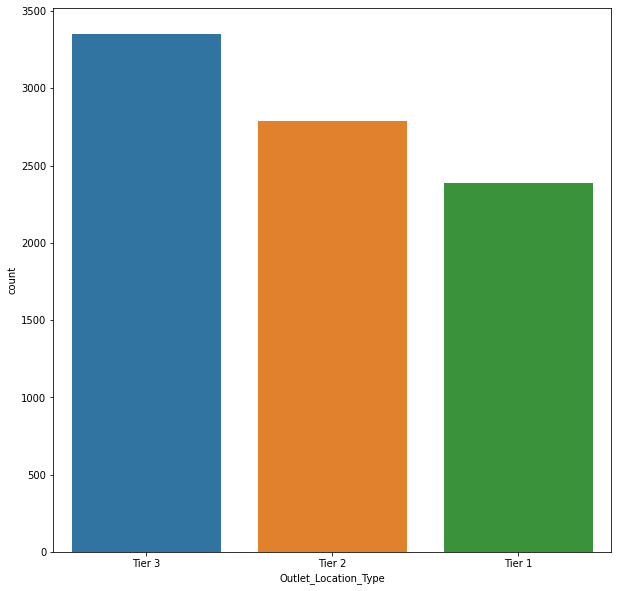

In [56]:
plt.figure(figsize = (10,10))
sns.countplot('Outlet_Location_Type', data = sales_data_train, order = sales_data_train['Outlet_Location_Type'].value_counts().index )

In [ ]:
"""inference:-there are more stores in tires 3 cities i.e 
maxumum outlets in tires 3 cities"""

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

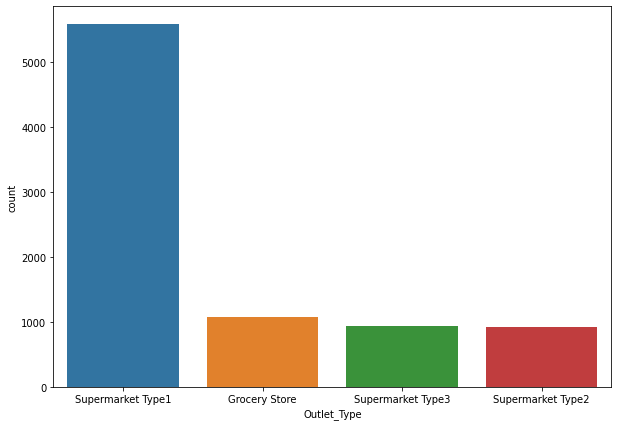

In [57]:
#outlet type stores with tire cities
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Type', data = sales_data_train, order = sales_data_train['Outlet_Type'].value_counts().index )

In [ ]:
"""innference:- supermarkets are more maxumim outlet
 types than any other outlet types"""

In [ ]:
#Outlet eastablishing years i.e number of years


<AxesSubplot:xlabel='Years_Established', ylabel='count'>

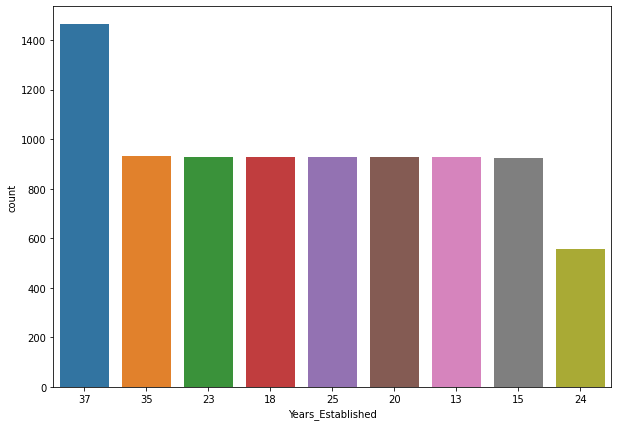

In [58]:
plt.figure(figsize = (10,7))
sns.countplot('Years_Established', data = sales_data_train, order = sales_data_train['Years_Established'].value_counts().index )

In [ ]:
"""inference:-Most of the outlets are running 37 years onwards
 i.e age of outlet are 37 years"""

In [ ]:
#EDA part 2:-Bivariate Analysis
"""Bivariate analysis refers to the analysis of two variables to determine
 relationships between them."""

In [ ]:
#Analyzing outlet sales Items Fat Content to Item Outlet Sales


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

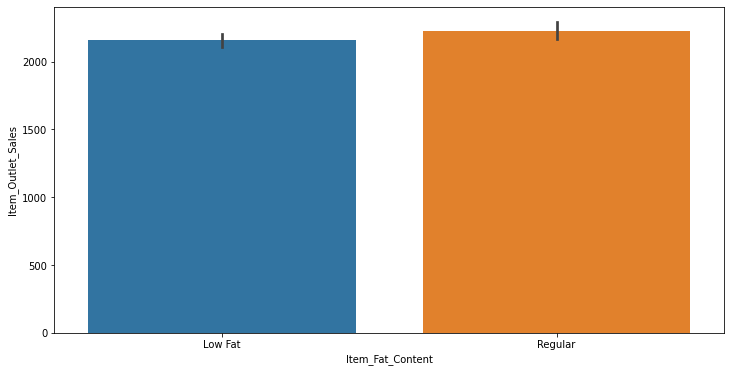

In [59]:
plt.figure(figsize = (12,6))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data = sales_data_train)

In [ ]:
"""Both low fat and Regular items sale are high in outlet 
sale items both are contributing equal revenue generation"""

In [ ]:
#Item Type to Item Outlet Sales


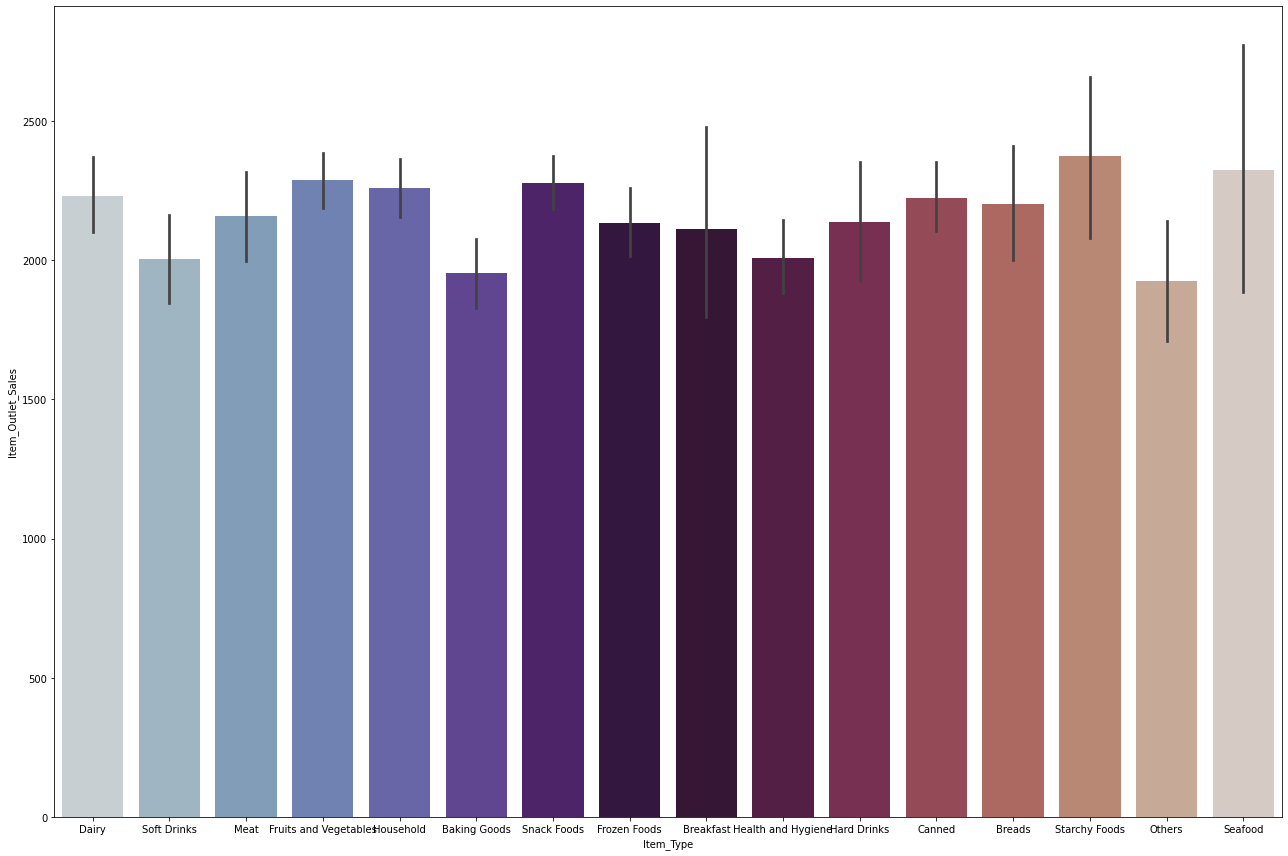

In [60]:
plt.figure(figsize=(18,12))
sns.barplot(data=sales_data_train,x="Item_Type",y="Item_Outlet_Sales",palette='twilight')
plt.tight_layout()
plt.show()

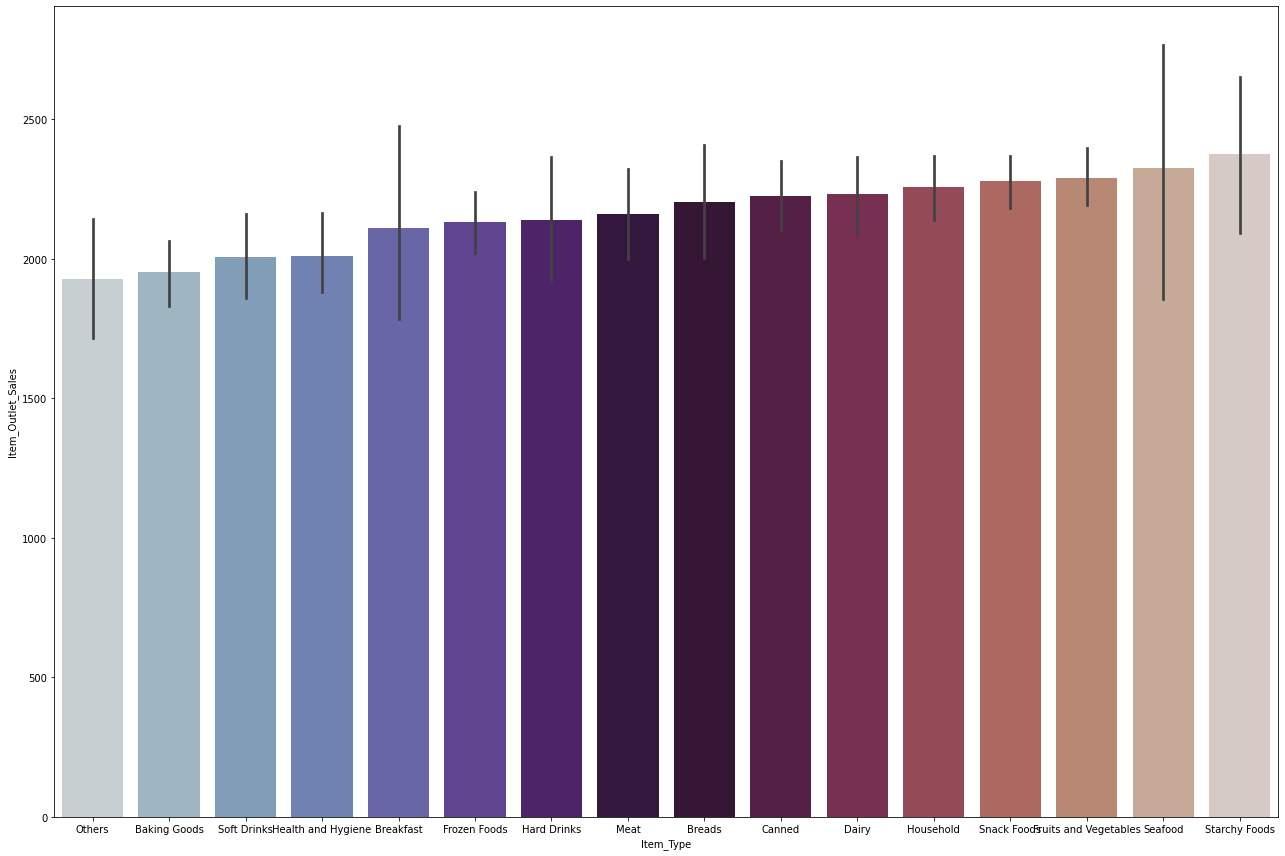

In [61]:
plt.figure(figsize=(18,12))
sns.barplot(data=sales_data_train,x="Item_Type",y="Item_Outlet_Sales",
           palette='twilight',order=sales_data_train.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values().index)
plt.tight_layout()
plt.show()

In [ ]:
"""we can observe from this bar plot we can observe that 'fruits' and
 'vegitables' are generating hight revenue , however 'seafood' and 'Starchy Foods'
are also generating the revenue so better to focus more on such
 products eventhogh sales are less"""

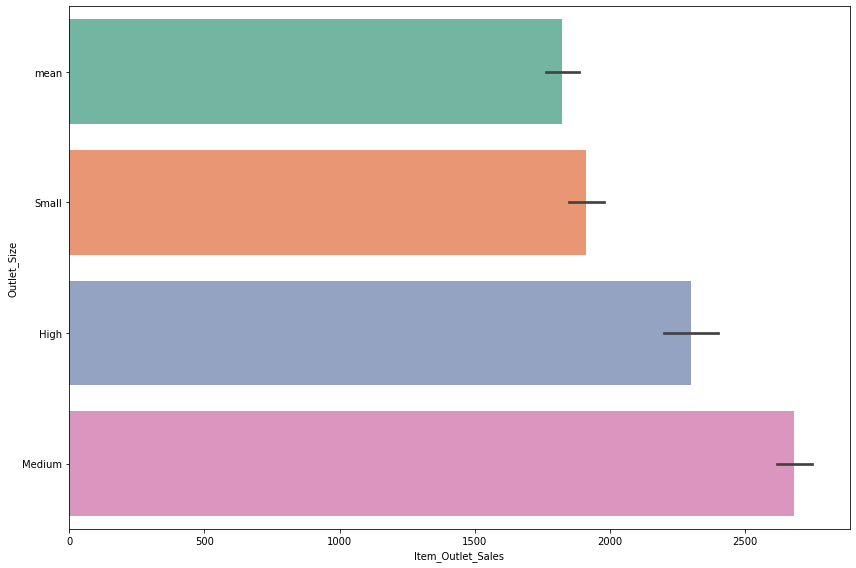

In [62]:
#Outlet Size to Item Outlet Sales
plt.figure(figsize=(12,8))
sns.barplot(data=sales_data_train,y="Outlet_Size",x="Item_Outlet_Sales",
            palette='Set2',
                order=sales_data_train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().sort_values().index)
plt.tight_layout()
plt.show()

In [ ]:
"""we can observe fromhere that medium and high size have
 maximum possibility to generate revenue"""

In [ ]:
#Outlet Location to Item Outlet Sales

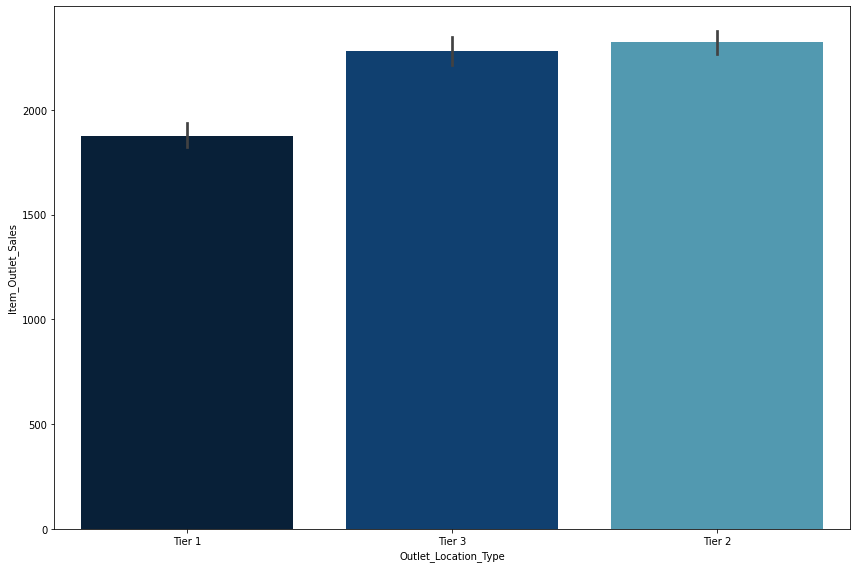

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(data=sales_data_train,x="Outlet_Location_Type",y="Item_Outlet_Sales",
            palette='ocean',
              order=sales_data_train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values().index)

plt.tight_layout()
plt.show()

In [ ]:
"""we can observe fromhere tire 3 and tire 2 outlet 
locations have maximum revenue generation capacity """

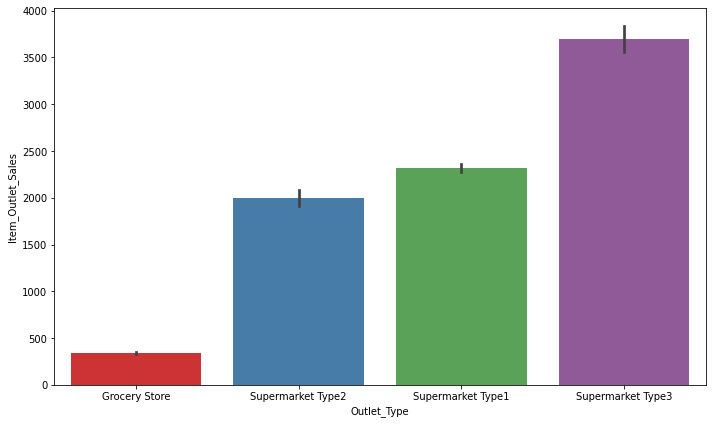

In [64]:
#Outlet Type to Item Outlet Sales
plt.figure(figsize=(10,6))
sns.barplot(data=sales_data_train,x="Outlet_Type",y="Item_Outlet_Sales",
            palette='Set1',
                order=sales_data_train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values().index)

plt.tight_layout()
plt.show()

In [ ]:
"""Type 3- Supermaket have maximum revenue generation 
capacity through type1-Supermaket have maxumim number of outlets """

In [65]:
#Outlet Age to Item Outlet Sales
plt.figure(figsize=(8,5))
sns.barplot(data=sales_data_train,x="Outlet_Age",y="Item_Outlet_Sales",
            palette='spring',
               order=sales_data_train.groupby("Outlet_Age")["Item_Outlet_Sales"].mean().sort_values().index)

plt.tight_layout()
plt.show()

KeyError: 'Outlet_Age'

<Figure size 576x360 with 0 Axes>

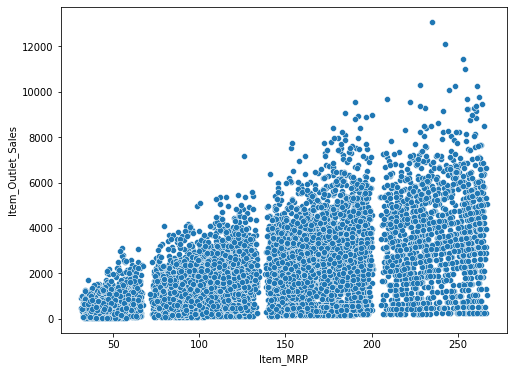

In [66]:
#Item MRP to Item Outlet Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x="Item_MRP",y='Item_Outlet_Sales',data=sales_data_train)
plt.show()

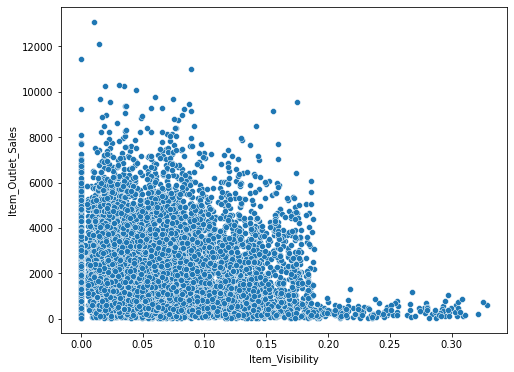

In [67]:
#Item Visiblity to Item Outlet Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x="Item_Visibility",y='Item_Outlet_Sales',data=sales_data_train)
plt.show()

In [ ]:
"""We can Observation one intresting inference, 
where the visiblity of Items is Zero, which suggest those items kept behind in shelf 
and amlost have no visiblity can also be sold. This show Consumer tend to
 search for their own products""""

In [ ]:
#Distribution Plot


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>],
       [<AxesSubplot:title={'center':'Years_Established'}>,
        <AxesSubplot:>]], dtype=object)

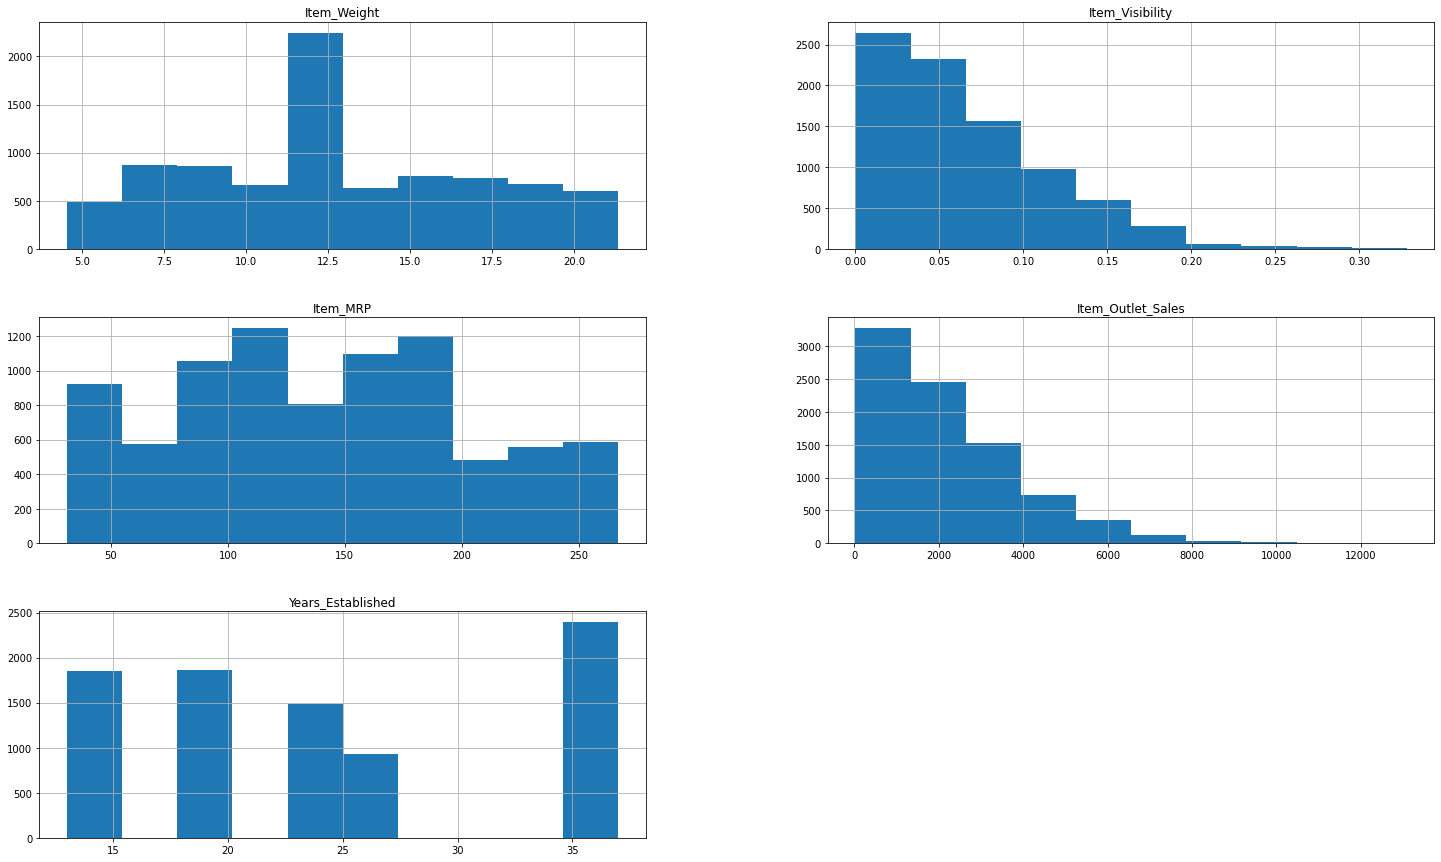

In [68]:
sales_data_train.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=(25,15), layout=None, bins=10, backend=None,legend=False)



array([[<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Years_Established', ylabel='Item_Weight'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Years_Established', ylabel='Item_Visibility'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Year

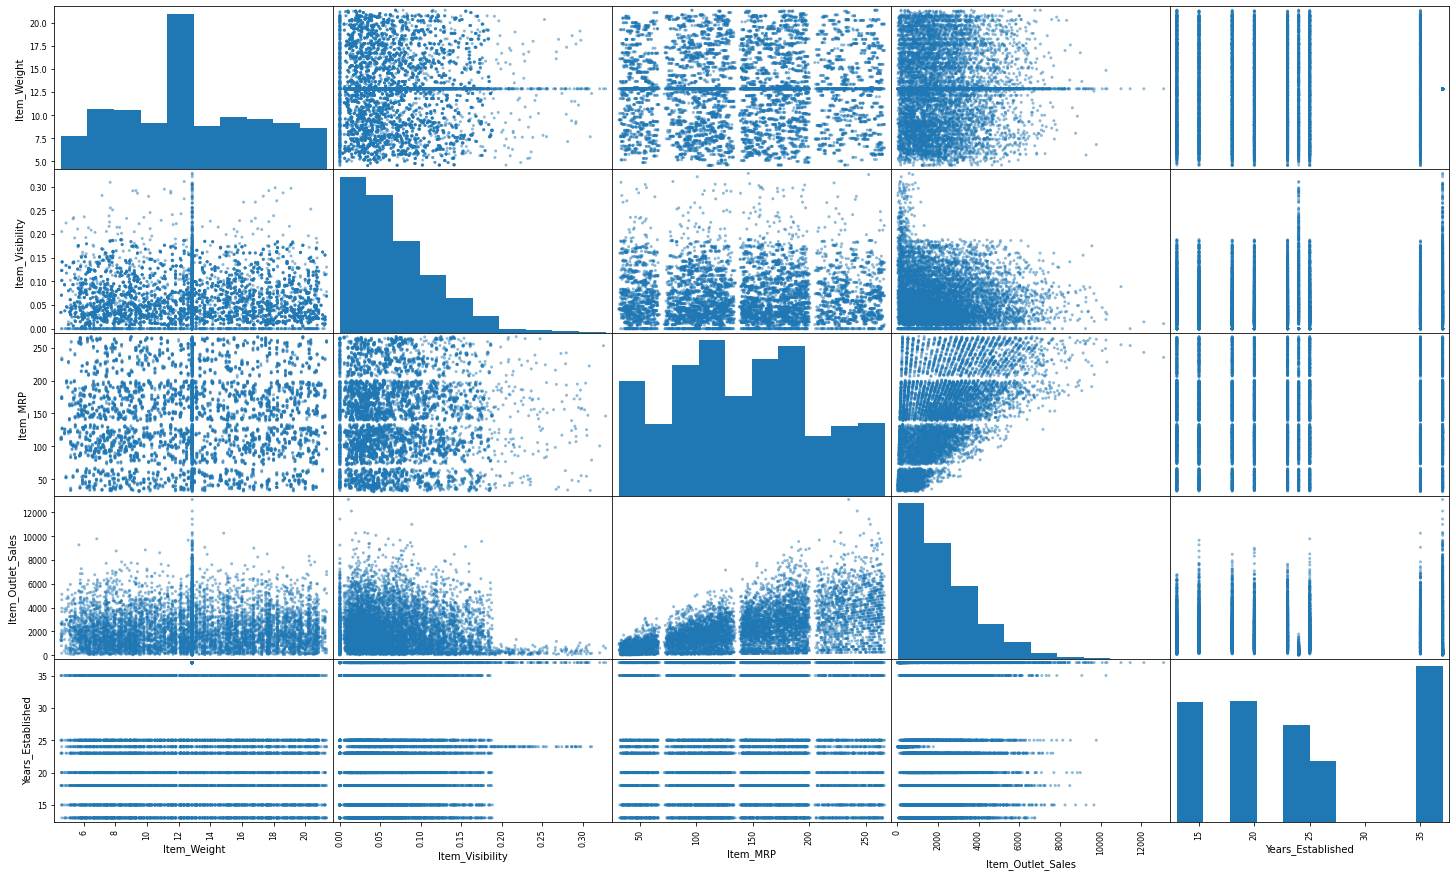

In [69]:
## scatter plot matrix
scatter_matrix(sales_data_train, alpha=0.5, figsize=(25,15), ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)


Item_Weight             AxesSubplot(0.125,0.749828;0.133621x0.130172)
Item_Visibility      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Item_MRP              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Item_Outlet_Sales    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Years_Established    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

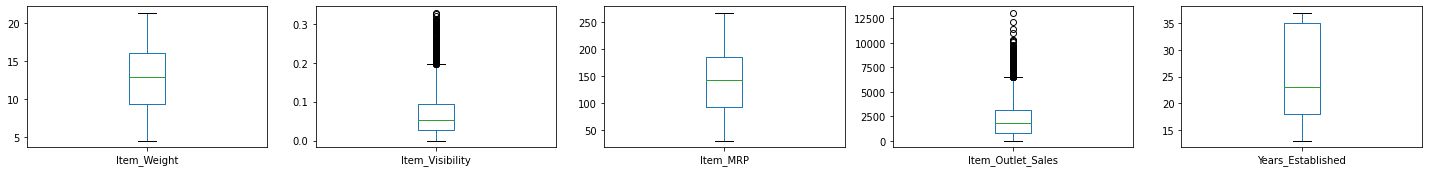

In [70]:
#Outlier
#Univariate Plots
# box and whisker plots

sales_data_train.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(25,15))


In [ ]:
"""we can onserve clearly there outliers in 'item_visibility'
 and 'item_ouliers sales"""


In [71]:
#Handling Outliers for Training data 
z1 = np.abs(stats.zscore(sales_data_train["Item_Outlet_Sales"]))
for i in (np.where(z1>3)):
    sales_data_train.drop(i,inplace=True)
sales_data_train.set_index( np.arange(8433),inplace=True )
z2 = np.abs(stats.zscore(sales_data_train["Item_Visibility"]))



In [72]:
##Handling Outliers for Testing data 
z3 = np.abs(stats.zscore(sales_data_test["Item_Visibility"]))
for x in (np.where(z3>3)):
    sales_data_test.drop(x,inplace=True)
sales_data_test.set_index( np.arange(5600),inplace=True )

In [73]:
sales_data_train2 = sales_data_train.drop(columns='Item_Outlet_Sales')

<AxesSubplot:title={'center':'Correlated with SalePrice'}>

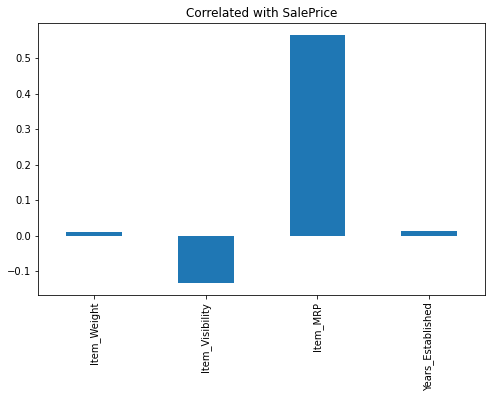

In [74]:
#Correlation Matrix
sales_data_train2.corrwith(sales_data_train['Item_Outlet_Sales']).plot.bar(figsize=(8,5), title='Correlated with SalePrice')

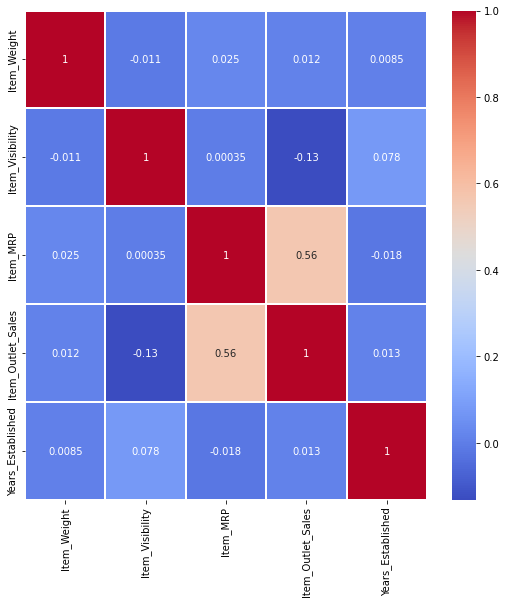

In [75]:
plt.figure(figsize=(9, 9))
ax = sns.heatmap(data=sales_data_train.corr(), cmap='coolwarm', annot=True, linewidths=2)

In [76]:
#Dealing with the Categorical Variables
y_train = sales_data_train['Item_Outlet_Sales'].to_frame(name='Target')
x_train = sales_data_train.drop('Item_Outlet_Sales', axis=1)
x_test = sales_data_test.copy()

In [77]:
dummy_sales_train = pd.get_dummies(x_train, drop_first=True)
dummy_sales_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Established,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_mean,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,23,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,13,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,23,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,24,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,35,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [78]:
dummy_sales_test = pd.get_dummies(x_test, drop_first=True)
dummy_sales_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Established,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_mean,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,23,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,15,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.600000,0.099575,241.7538,24,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.315000,0.015388,155.0340,15,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,12.695633,0.118599,234.2300,37,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [79]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def minmax(sales_data_train,sales_data_test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train_scaled = scaler.fit_transform(sales_data_train)
    X_train = pd.DataFrame(data=x_train_scaled, columns = list(sales_data_train.columns))
    x_test_scaled = scaler.fit_transform(dummy_sales_test)
    X_test = pd.DataFrame(data=x_train_scaled, columns = list(dummy_sales_test.columns))
    return X_train,X_test
def standard(sales_data_train,sales_data_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(sales_data_train)
    X_train = pd.DataFrame(data=x_train_scaled, columns = list(sales_data_train.columns))
    x_test_scaled = scaler.fit_transform(dummy_sales_test)
    X_test = pd.DataFrame(data=x_train_scaled, columns = list(dummy_sales_test.columns))
    return X_train,X_test

In [80]:
#Create the Training & Testing Sets
from sklearn.model_selection import train_test_split as tts
X_train_nor,X_test_nor=minmax(dummy_sales_train,dummy_sales_test)
X_train_std,X_test_std=standard(dummy_sales_train,dummy_sales_test)

X_train, X_test, y_train, y_test =tts(X_train_nor, y_train, train_size=0.7, random_state=1)

In [81]:
X_train.shape

(5903, 28)

In [82]:
X_test.shape

(2530, 28)

In [83]:
y_train.shape

(5903, 1)

In [85]:
y_test.shape

(2530, 1)

In [ ]:
#Applying the Algorithms prepared dataset 
#1.Linear Regression


In [87]:
sales_data_train2.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Years_Established'],
      dtype='object')

In [88]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Years_Established']

In [91]:
#Linear regression
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)


In [92]:
y_pred

array([[-1001.73680788],
       [ 1295.14023951],
       [ 2170.53250165],
       ...,
       [  590.04085837],
       [ 1798.99727589],
       [ 2045.79321585]])

In [94]:
#LR_Evaluation_R2 Score
r2_Linear_Regression = r2_score(y_test, y_pred)
print('R2 score of Linear regression:',r2_Linear_Regression)


R2 score of Linear regression: 0.5621953439724636


In [96]:
#MAE(Mean Absolute error) and MSE(Mean squared error)
MAE = metrics.mean_absolute_error(y_test, y_pred) 
MSE = metrics.mean_squared_error(y_test, y_pred)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 792.937546329426
mean squared error: 1086444.1569737382


In [97]:
#RMSE(Root Mean Squared error)
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1042.3263198124369


In [98]:
#2) Random Forest Regressor
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

In [99]:
# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [100]:
y_pred

array([ 451.22522334, 1169.84849488, 2020.01234577, ...,  719.34043105,
        571.05157989, 2015.68214194])

In [101]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.5873683404746544


In [103]:
#3) Lasso
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

In [104]:
y_predict

array([-996.66027671, 1293.90913294, 2171.82721975, ...,  591.35387952,
       1800.04554609, 2036.81971387])

In [118]:
print('R squared training set', round(LS.score(X_train, y_train)*100, 2))
print('R squared test set', round(LS.score(X_test, y_test)*100, 2))

R squared training set 56.15
R squared test set 56.2


In [ ]:
"""Observation on scores Random forest clearly given as the avergage score is 0.59 While Linear Regression is 0.56 and lasso has a score of 0.56"""

In [135]:
#KNN
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import accuracy_score

In [123]:
knn_model =KNR(n_neighbors=3)
knn_model.fit(X_train,y_train)  
y_pred = knn_model.predict(X_test) 

In [124]:
y_pred 

array([[ 102.5332    ],
       [1741.7328    ],
       [2020.92493333],
       ...,
       [ 845.78793333],
       [ 345.10633333],
       [1204.87606667]])

In [133]:
#to k value for different RMSE values
rmse_val_list = [] #to store rmse values for different k

for i in range(1,round(sqrt(X_train.shape[0]))):
    model = KNR(n_neighbors = i)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
   
    
    rmse_val_list.append(error) #store rmse values
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


The minimum error we get is  1130.4005306422175
The corresponding K value is  7


<AxesSubplot:>

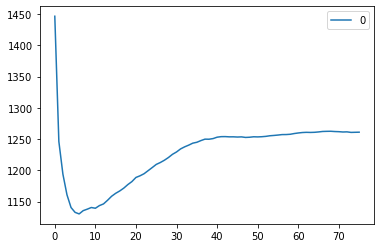

In [134]:
# Construct Elbow curve-to decide optimal value of k
curve=pd.DataFrame(rmse_val_list)
curve.plot()
"""we can onserve fro Elbow cure ,the cureve pickvalue 
changing approximatel at 7"""

In [ ]:
"""we can observe claerly that if we take k=1, we get a very high RMSE value. 
The RMSE value decreases as we increase the k value. At k= 7, the RMSE is 
approximately 1130, and shoots up on further increasing the k value. 
We can safely say that k=7 will give us the best result in this case."""

In [ ]:
#Implementing GridsearchCV
"""For deciding the value of k, plotting the elbow curve every time is tedious process. 
we can simply use gridsearch to find the best value."""

In [142]:
from sklearn.model_selection import GridSearchCV

number_of_neighbors = range(1,200)
#number_of_neighbors = range(1,iter_size)
cvals = 5

params = {'n_neighbors':number_of_neighbors}

model = GridSearchCV(knn_model, params, cv=cvals)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 200)})

In [125]:
#KNN evaluation 

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)


In [127]:
mse

703760.111699846

In [128]:
rmse

838.9041135313654

In [130]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)


In [131]:
mse

1425470.389508173

In [132]:
rmse

1193.9306468585908

In [143]:
#HyperParameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.537 using {'n_estimators': 1000}
0.501 (0.008) with: {'n_estimators': 10}
0.533 (0.008) with: {'n_estimators': 100}
0.537 (0.009) with: {'n_estimators': 1000}


In [144]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [145]:
grid_search_forest.best_score_

0.5369711397692978

In [146]:
Y_pred_rf_grid=grid_search_forest.predict(X_test)

In [147]:
grid_r2 = r2_score(y_test,Y_pred_rf_grid)
print('R2 score for Grid Search: ',grid_r2*100)

R2 score for Grid Search:  56.30431236649252


In [ ]:
"""we can observe  Hyperperameter tuning did not drastically change 
the model performance so we will be using the default 
RandomForestRegressor as our model."""

In [ ]:
#cross_val(model,RandomForestRegressor(),sales_data_train,y_test,5)